In [ ]:
import numpy as np
import pandas as pd
import pickle
import io
import sklearn
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor,     GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Crop_recommendation.csv to Crop_recommendation.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['Crop_recommendation.csv']))
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

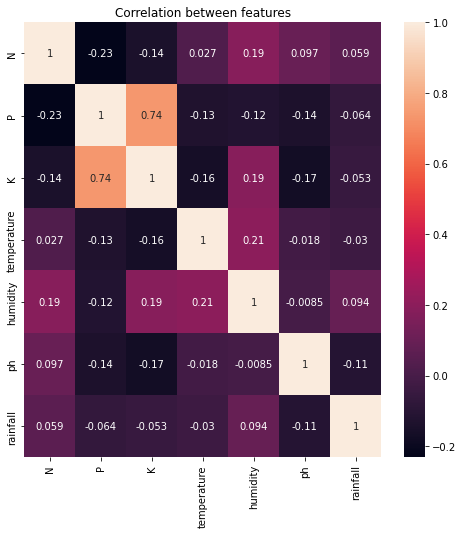

In [ ]:
plt.figure(figsize=(8,8))
plt.title("Correlation between features")
corr = data.corr()
sns.heatmap(corr, annot=True)

Text(0, 0.5, 'crops')

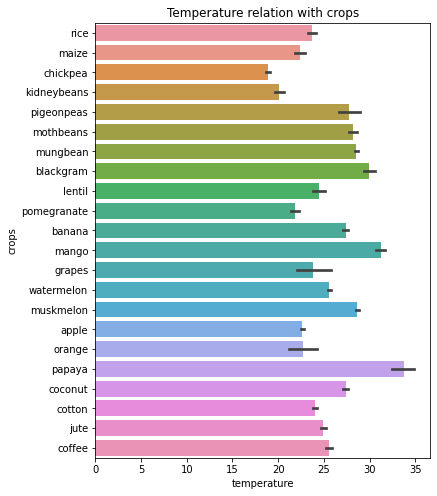

In [ ]:
plt.figure(figsize=(6,8))
plt.title("Temperature relation with crops")
sns.barplot(y="label", x="temperature", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

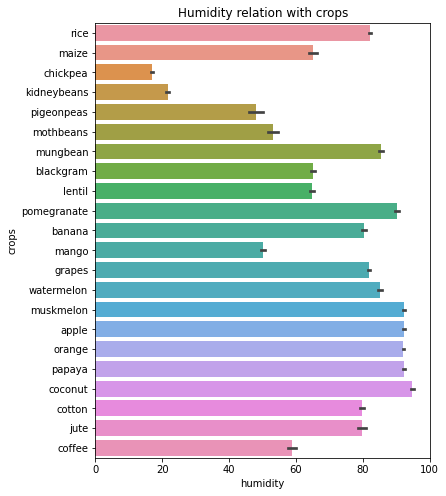

In [ ]:
plt.figure(figsize=(6,8))
plt.title("Humidity relation with crops")
sns.barplot(y="label", x="humidity", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

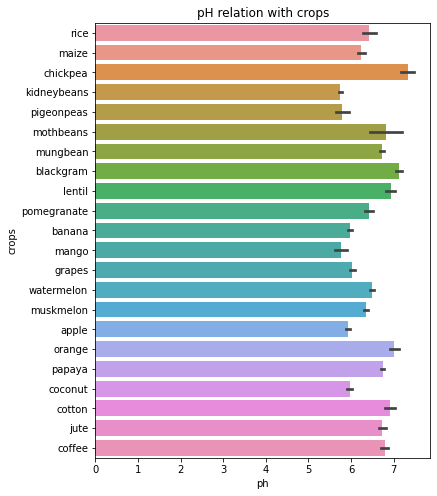

In [ ]:
plt.figure(figsize=(6,8))
plt.title("pH relation with crops")
sns.barplot(y="label", x="ph", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'crops')

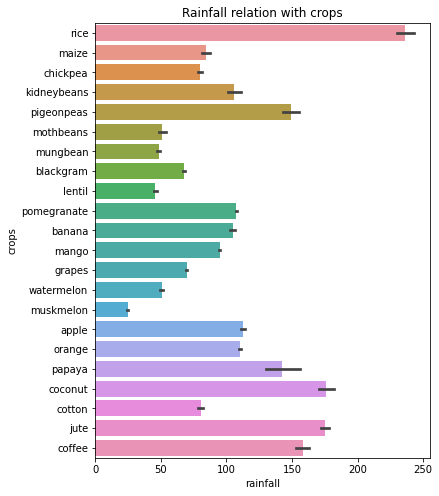

In [ ]:
plt.figure(figsize=(6,8))
plt.title("Rainfall relation with crops")
sns.barplot(y="label", x="rainfall", data=data)
plt.ylabel("crops")

Text(0, 0.5, 'Crops')

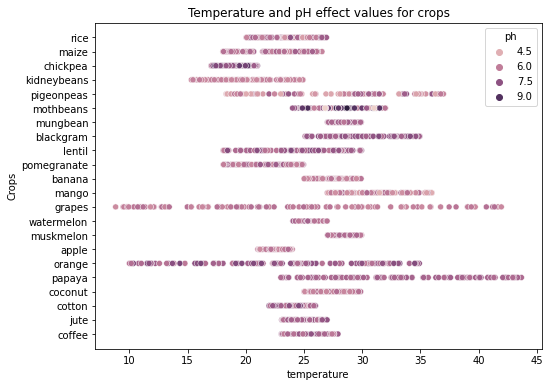

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Temperature and pH effect values for crops")
sns.scatterplot(data=data, x="temperature", y="label", hue="ph")
plt.ylabel("Crops")

Text(0, 0.5, 'Crops')

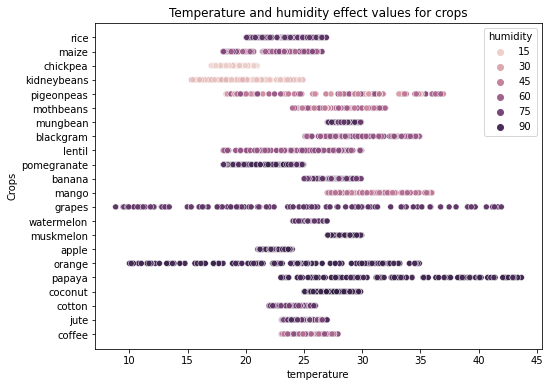

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Temperature and humidity effect values for crops")
sns.scatterplot(data=data, x="temperature", y="label", hue="humidity")
plt.ylabel("Crops")

Text(0, 0.5, 'Crops')

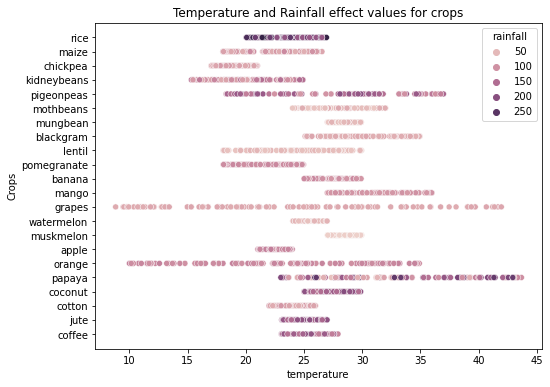

In [ ]:
plt.figure(figsize=(8,6))
plt.title("Temperature and Rainfall effect values for crops")
sns.scatterplot(data=data, x="temperature", y="label", hue="rainfall")
plt.ylabel("Crops")

Text(0.5, 1.0, 'Values of N, P, K in soil')

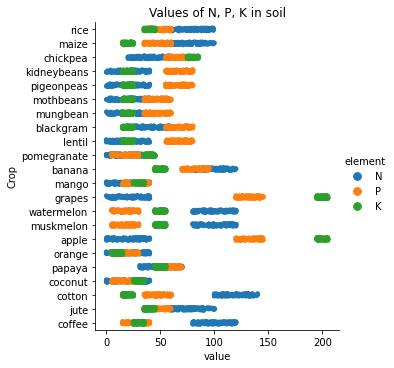

In [ ]:
data_npk = pd.melt(data, id_vars=["label"], value_vars=["N", "P", "K"],var_name='element', value_name='value')
sns.catplot(y="label", x="value", hue="element", data=data_npk)
plt.ylabel("Crop")
plt.title("Values of N, P, K in soil")

**Prediction**

In [ ]:
encoder = LabelEncoder()
data.label = encoder.fit_transform(data.label)
features = data.drop("label", axis=1)
target = data.label
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=42)

**Linear Regression**

In [ ]:
lr = LinearRegression().fit(X_train, y_train)
lr_pred= lr.score(X_test, y_test)

print("Training score: {:.3f}".format(lr.score(X_train, y_train)))
print("Test score: {:.3f}".format(lr.score(X_test, y_test)))

Training score: 0.303
Test score: 0.276


**Decision Tree Classifier**

In [ ]:
tree = DecisionTreeClassifier(max_depth=15,random_state=0).fit(X_train, y_train)
tree_pred= tree.score(X_test, y_test)

print("Training score: {:.3f}".format(tree.score(X_train, y_train)))
print("Test score: {:.3f}".format(tree.score(X_test, y_test)))

Training score: 1.000
Test score: 0.987


**Random Forests**

In [ ]:
rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=0).fit(X_train, y_train)
rf_pred= rf.score(X_test, y_test)

print("Training score: {:.3f}".format(rf.score(X_train, y_train)))
print("Test score: {:.3f}".format(rf.score(X_test, y_test)))

Training score: 1.000
Test score: 0.989


**Gradient Booster Classifier**

In [ ]:
gbr = GradientBoostingClassifier(n_estimators=20, max_depth=4, max_features=2, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 1.000
Test score: 0.982


**Support Vector Classifier**

In [ ]:
svm = SVC(C=100, gamma=0.001).fit(X_train, y_train)
svm_pred= svm.score(X_test, y_test)

print("Training score: {:.3f}".format(svm.score(X_train, y_train)))
print("Test score: {:.3f}".format(svm.score(X_test, y_test)))

Training score: 0.998
Test score: 0.982


**Logistic regression**

In [ ]:
log_reg = LogisticRegression(C=0.1, max_iter=100000).fit(X_train, y_train)
log_reg_pred= log_reg.score(X_test, y_test)

print("Training score: {:.3f}".format(log_reg.score(X_train, y_train)))
print("Test score: {:.3f}".format(log_reg.score(X_test, y_test)))

Training score: 0.993
Test score: 0.973


**MLPClassifer**

In [ ]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0, max_iter=10000, alpha=0.01,hidden_layer_sizes=[100,50])
mlp.fit(X_train_scaled, y_train)

mlp_pred= mlp.score(X_test_scaled, y_test)

print("Training score: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Test score: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Training score: 0.999
Test score: 0.975
